In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


---

In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)



:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
price_change_data = df_market_data
scaled_data = scaler.fit_transform(price_change_data)

In [6]:
# Create a DataFrame with the scaled data
scaled_crypto_data = pd.DataFrame(scaled_data, columns=price_change_data.columns)

# Copy the crypto names from the original data

# Set the coinid column as index
#(since 'coin_id" is the index, we are using the DataFrame as is...)

# Display sample data
print(scaled_crypto_data.head())

   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                     0.008005                     -0.55

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pathlib import Path
import hvplot.pandas
df_market_data_scaled = scaled_crypto_data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [8]:
# Prepare a range of k values to test
k_values = range(1, 11)

# Initialize a list to hold the inertia values
inertia_list = []

# Loop over each k value, fit the KMeans model, and add the inertia to the list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    inertia_list.append(kmeans.inertia_)

# Ensure each k value has a corresponding inertia value
elbow_data = {'k': k_values, 'inertia': inertia_list}

# Create a DataFrame to hold the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Display the first few rows to confirm they are not constant
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


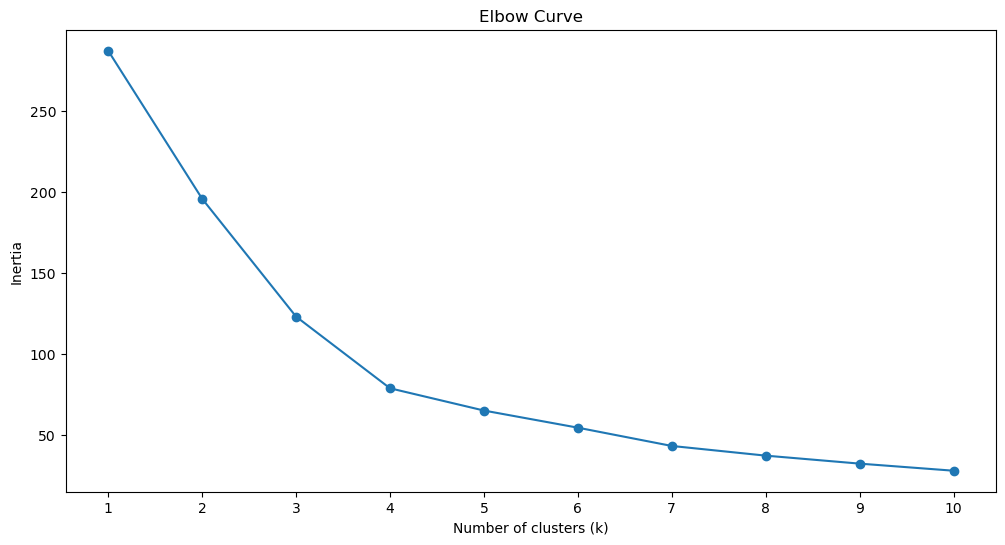

In [9]:
import matplotlib.pyplot as plt

# Assuming 'df_elbow' is a DataFrame with two columns: 'k' and 'inertia'
# where 'k' is a sequence of integers and 'inertia' is the corresponding inertia values.

plt.figure(figsize=(12, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** In the graph above, the elbow seems to be at k =3, as the inertia decrease from k=2 to k=3 is significant and beyong k=3, the decrease in inertia slows down noticeably.
The best value for k based on this Elbow Curve appears to be 3.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [10]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=3, random_state=42)

In [11]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

KMeans(n_clusters=3, random_state=42)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [13]:
# Create a copy of the DataFrame
df_market_data_with_clusters = df_market_data_scaled.copy()

In [14]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_with_clusters['cluster'] = cluster_labels

# Display sample data
print(df_market_data_with_clusters.head())

   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                     0.008005                     -0.55

In [15]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas  

scatter_plot = df_market_data_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',
    hover_cols=['coin_id']  
)

# Display the plot
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

In [16]:
# Save the interactive plot as HTML
hvplot.save(scatter_plot, 'scatter_plot.html')


---

### Optimize Clusters with Principal Component Analysis.

In [17]:
from sklearn.decomposition import PCA

#Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

# Use the PCA model with `fit_transform` to reduce to three principal components.
df_market_data_pca = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=df_market_data_pca, columns=['PC1', 'PC2', 'PC3'])

# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance of the three principal components
total_explained_variance = explained_variance.sum()

df_pca.head(), total_explained_variance


(        PC1       PC2       PC3
 0 -0.600667  0.842760  0.461595
 1 -0.458261  0.458466  0.952877
 2 -0.433070 -0.168126 -0.641752
 3 -0.471835 -0.222660 -0.479053
 4 -1.157800  2.041209  1.859715,
 0.8950316570309841)

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 0.895

In [18]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(
    df_pca,
    columns=['PC1', 'PC2', 'PC3']
)


# Copy the crypto names from the original data
df_pca_data['coin_id'] = df_market_data.index

# Set the coinid column as index
df_pca_data.set_index('coin_id', inplace=True)

# Display sample data
df_pca_data.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [19]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)


In [20]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia_values.append(kmeans.inertia_)

In [21]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

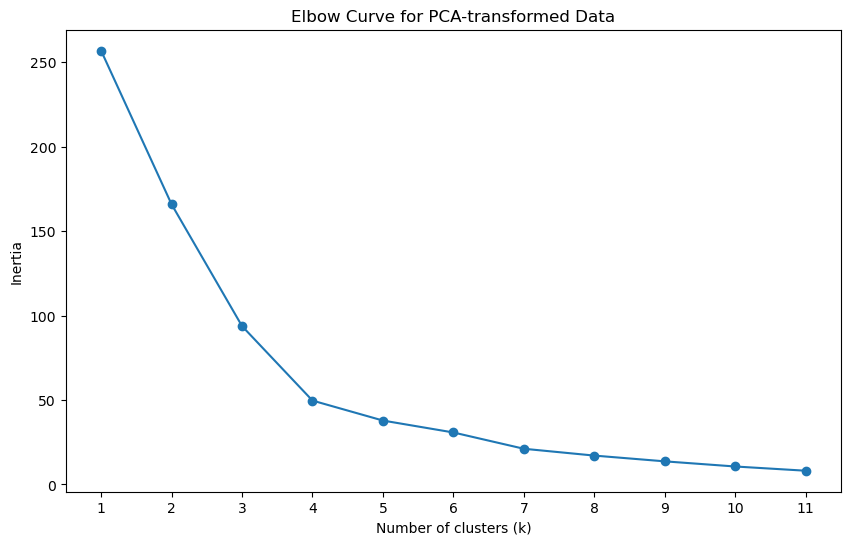

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve for PCA-transformed Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The Elbow Curve for the PCA transformed data suggests that the best value for K is where the inertia starts to decrease at a slower rate.
                Based on the curve above, it appears that the elbow is at k=4 because the drop in inertia from k =3 to k=4 is less steep than from k=2 to k=3. 
                Therefore, the best value for k when using the PCA data according to the graph would be 4. 
* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** As for the comparios with tthe original data, the best K value was 3. There is a difference suggesting that thet PCA transformation has slightly changed 
                the structure of the data, possibly reducing noise and less informative variance, leading to a different optimal number of clusters. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=k, random_state=42)

In [24]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

KMeans(n_clusters=11, random_state=42)

In [25]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print(cluster_labels)

[ 4  4  9  9  1  4 10  4  4  6  0  9  9  1  6  6  0  6  4  9  0  4  9  9
  5  9  6  0  4  8  6  6  2  6  7  5  3  0  6  9  9]


In [26]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = df_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
df_pca_with_clusters['cluster'] = cluster_labels

# Display sample data
print(df_pca_with_clusters.head())

        PC1       PC2       PC3  cluster
0 -0.600667  0.842760  0.461595        4
1 -0.458261  0.458466  0.952877        4
2 -0.433070 -0.168126 -0.641752        9
3 -0.471835 -0.222660 -0.479053        9
4 -1.157800  2.041209  1.859715        1


In [27]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas



scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    hover_cols=['coin_id']  
)

scatter_plot
# Save the interactive plot as HTML
hvplot.save(scatter_plot, 'scatter_plot.html')


Below is an alternate way to visualize the data and provide a scatter plot that is segmented better 

In [28]:
import hvplot.pandas
import holoviews as hv
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

# Ensure that Bokeh outputs to the notebook
output_notebook()


# Convert DataFrame to a ColumnDataSource
source = ColumnDataSource(df_pca_with_clusters)

# Create a new figure with a specific aspect ratio
p = figure(width=800, height=500,
           x_range=(-15, 20), y_range=(-10, 15))

# Add scatter glyphs with different colors by segment
# Assuming 'cluster' is the column in your DataFrame with cluster assignments
# And assuming the cluster labels are integers starting from 0
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
for i in range(df_pca_with_clusters['cluster'].nunique()):
    df = df_pca_with_clusters[df_pca_with_clusters['cluster'] == i]
    p.scatter('PC1', 'PC2', source=df, color=colors[i % len(colors)], legend_label=f'Segment {i}')

# Display the plot
show(p)

# Save the interactive plot as HTML
hvplot.save(scatter_plot, 'scatter_plot.html')


Loading BokehJS ...

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [29]:
# Composite plot to contrast the Elbow curves

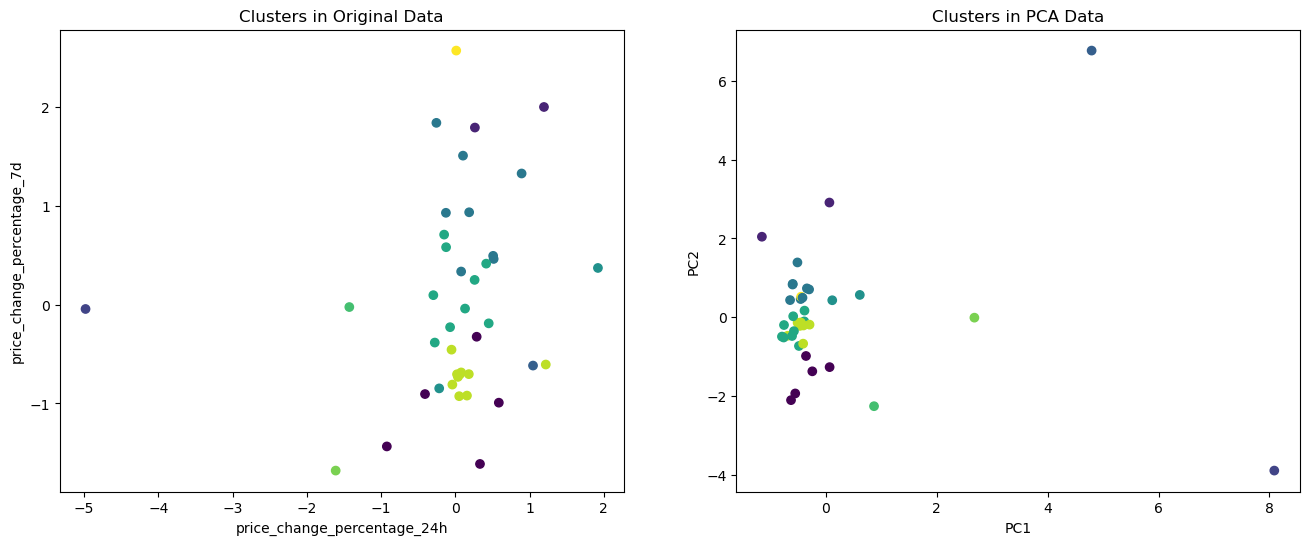

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Now you create a new DataFrame that includes the original market data and the cluster labels
df_market_data_with_clusters = df_market_data_with_clusters.copy()
df_market_data_with_clusters['cluster'] = cluster_labels  # This adds the cluster labels to your DataFrame

# Now you can create your scatter plots as you intended
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for original clusters
ax[0].scatter(df_market_data_with_clusters['price_change_percentage_24h'], df_market_data_with_clusters['price_change_percentage_7d'], c=df_market_data_with_clusters['cluster'], cmap='viridis')
ax[0].set_title('Clusters in Original Data')
ax[0].set_xlabel('price_change_percentage_24h')
ax[0].set_ylabel('price_change_percentage_7d')

# Scatter plot for PCA clusters
# This assumes that you have a DataFrame that contains the PCA-transformed data with cluster labels
# Let's call this DataFrame df_pca_with_clusters for the sake of the example
ax[1].scatter(df_pca_with_clusters['PC1'], df_pca_with_clusters['PC2'], c=df_pca_with_clusters['cluster'], cmap='viridis')
ax[1].set_title('Clusters in PCA Data')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

plt.show()

# Save the interactive plot as HTML
hvplot.save(scatter_plot, 'scatter_plot.html')


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

In the specific case of the above  plots, it seems that PCA has managed to create clusters that are more distinct and separated compared to the original data clusters, which may overlap more. This indicates that PCA has extracted the underlying structure of the data, which corresponds to more meaningful clusters for K-Means to detect. We also saw that PCA analysis can also reduce noise and outliers. However, it is important to note that PCA is a linear transformation, and if the true clusters are non-linearly separated in the original feature space, PCA might not be the best method to use prior to clustering. This could be an issue as the PCA scatterplot above does not show a complete and clear dimarcation after K means. 
To conclude, while PCA can be very effective for clustering in certain cases, it is crucial to understand the nature of your dataset and consider whether the assumptions of PCA apply before deciding to use it as part of your clustering workflow. This may not be optimal for this situation of Cryptocurrencies. 